## Homework 6

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.

### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

### Preparing the dataset 

For this homework, we only want to use a subset of data. This is the same subset we used in homework #2.
But in contrast to homework #2, we are going to use all columns of the dataset.

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Preparation:

* Fill missing values with zeros.
* Apply the log transform to `median_house_value`.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('./data/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data = data[(data['ocean_proximity'] == '<1H OCEAN') | (data['ocean_proximity'] == 'INLAND')]
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


In [5]:
# Fill missing values with zeros.
data = data.fillna(0)

In [6]:
# Apply the log transform to median_house_value.
data['median_house_value'] = np.log1p(data['median_house_value'])

In [7]:
# Do train/validation/test split with 60%/20%/20% distribution.
y = data['median_house_value']
data = data.drop(['median_house_value'], axis=1)
data_full_train, data_test, y_full_train, y_test = train_test_split(data, y, test_size=0.2, random_state=1)
data_train, data_val, y_train, y_val = train_test_split(data_full_train, y_full_train, test_size=0.25, random_state=1)
len(data_train.values), len(data_val.values), len(data_test.values)

(9411, 3138, 3138)

In [8]:
# Use DictVectorizer(sparse=True) to turn the dataframes into matrices.
numerical = ['longitude', 'latitude', 'housing_median_age',	'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
categorical = ['ocean_proximity']
train_dicts = data_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts)
val_dicts = data_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
test_dicts = data_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dicts)

## Question 1

Let's train a decision tree regressor to predict the `median_house_value` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `ocean_proximity`
* `total_rooms`
* `latitude`
* **`population`**


In [9]:
dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


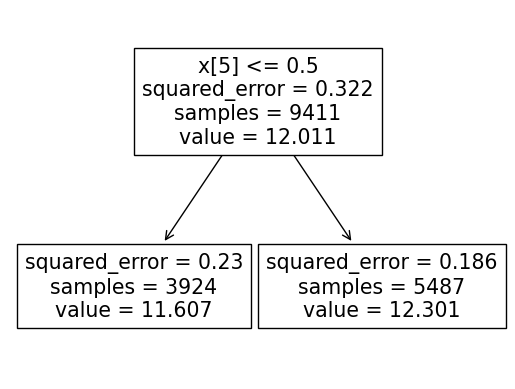

In [10]:
# feature use for splitting data X[5] -> population
print(dtr.feature_importances_)
plot_tree(dtr);

## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on validation?

* 0.045
* **0.245**
* 0.545
* 0.845

In [11]:
rfr = RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_val)
np.sqrt(mean_squared_error(y_val, y_pred)).round(3)

0.245

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for retrieving the answer.

- 10
- 25
- 50
- **160**

In [12]:
for n in range (10, 201, 10):
    rfr = RandomForestRegressor(n_estimators=n, n_jobs=-1, random_state=1)
    rfr.fit(X_train, y_train)
    y_pred = rfr.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred)).round(3)
    print(f'n_estimators: {n:3d} -> rmse: {rmse:.3f}')

n_estimators:  10 -> rmse: 0.245
n_estimators:  20 -> rmse: 0.239
n_estimators:  30 -> rmse: 0.237
n_estimators:  40 -> rmse: 0.235
n_estimators:  50 -> rmse: 0.235
n_estimators:  60 -> rmse: 0.234
n_estimators:  70 -> rmse: 0.234
n_estimators:  80 -> rmse: 0.234
n_estimators:  90 -> rmse: 0.234
n_estimators: 100 -> rmse: 0.234
n_estimators: 110 -> rmse: 0.234
n_estimators: 120 -> rmse: 0.234
n_estimators: 130 -> rmse: 0.234
n_estimators: 140 -> rmse: 0.233
n_estimators: 150 -> rmse: 0.233
n_estimators: 160 -> rmse: 0.233
n_estimators: 170 -> rmse: 0.233
n_estimators: 180 -> rmse: 0.233
n_estimators: 190 -> rmse: 0.234
n_estimators: 200 -> rmse: 0.234


## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

* 10
* 15
* **20**
* 25

In [16]:
for m in [10, 15, 20, 25]:
    total_rmse = 0
    for n in range (10, 201, 10):
        rfr = RandomForestRegressor(n_estimators=n, max_depth=m, n_jobs=-1, random_state=1)
        rfr.fit(X_train, y_train)
        y_pred = rfr.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred)).round(5)
        total_rmse += rmse
    mean_rmse = total_rmse / 20
    print(f'max_depth: {m:3d}, -> mean_rmse: {rmse:.5f}')
    

max_depth:  10, -> mean_rmse: 0.24484
max_depth:  15, -> mean_rmse: 0.23444
max_depth:  20, -> mean_rmse: 0.23368
max_depth:  25, -> mean_rmse: 0.23379


# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `total_rooms`
* `median_income`
* **`total_bedrooms`**
* `longitude`


In [22]:
#  most important feature use for splitting data X[4] -> total_bedrooms
rfr = RandomForestRegressor(n_estimators=10, max_depth=20, n_jobs=-1, random_state=1)
rfr.fit(X_train, y_train)
print(f'most important feature: {np.argmax(rfr.feature_importances_)} --> total_bedrooms')

most important feature: 4 --> total_bedrooms


## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* **0.3**
* 0.1
* Both give equal value

In [37]:
import xgboost as xgb
features = dv.get_feature_names_out()
features[5] = 'ocean_proximity=H OCEAN'
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
watchlist = [(dtrain, 'train'), (dval, 'val')]

/Users/wladimir/mambaforge/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


In [43]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, evals=watchlist, verbose_eval=5, num_boost_round=100)

[0]	train-rmse:8.07362	val-rmse:8.07348
[5]	train-rmse:1.38983	val-rmse:1.38852
[10]	train-rmse:0.33195	val-rmse:0.34802
[15]	train-rmse:0.22197	val-rmse:0.25614
[20]	train-rmse:0.20036	val-rmse:0.24508
[25]	train-rmse:0.18991	val-rmse:0.24021
[30]	train-rmse:0.18204	val-rmse:0.23833
[35]	train-rmse:0.17091	val-rmse:0.23452
[40]	train-rmse:0.16422	val-rmse:0.23379
[45]	train-rmse:0.15756	val-rmse:0.23302
[50]	train-rmse:0.15210	val-rmse:0.23262
[55]	train-rmse:0.14633	val-rmse:0.23167
[60]	train-rmse:0.14218	val-rmse:0.23160
[65]	train-rmse:0.13898	val-rmse:0.23169
[70]	train-rmse:0.13471	val-rmse:0.23108
[75]	train-rmse:0.13072	val-rmse:0.23036
[80]	train-rmse:0.12835	val-rmse:0.23045
[85]	train-rmse:0.12534	val-rmse:0.23010
[90]	train-rmse:0.12174	val-rmse:0.22957
[95]	train-rmse:0.11894	val-rmse:0.22906
[99]	train-rmse:0.11656	val-rmse:0.22897


In [44]:
y_pred = model.predict(dval)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse.round(3)

0.229

In [46]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, verbose_eval=5, evals=watchlist, num_boost_round=100)

[0]	train-rmse:10.37456	val-rmse:10.37545
[5]	train-rmse:6.13433	val-rmse:6.13236
[10]	train-rmse:3.63299	val-rmse:3.62939
[15]	train-rmse:2.15901	val-rmse:2.15616
[20]	train-rmse:1.29412	val-rmse:1.29329
[25]	train-rmse:0.78993	val-rmse:0.79342
[30]	train-rmse:0.50217	val-rmse:0.51149
[35]	train-rmse:0.34590	val-rmse:0.36371
[40]	train-rmse:0.26743	val-rmse:0.29345
[45]	train-rmse:0.23014	val-rmse:0.26315
[50]	train-rmse:0.21112	val-rmse:0.24907
[55]	train-rmse:0.20315	val-rmse:0.24427
[60]	train-rmse:0.19724	val-rmse:0.24107
[65]	train-rmse:0.19264	val-rmse:0.23932
[70]	train-rmse:0.18911	val-rmse:0.23824
[75]	train-rmse:0.18503	val-rmse:0.23731
[80]	train-rmse:0.18145	val-rmse:0.23594
[85]	train-rmse:0.17807	val-rmse:0.23475
[90]	train-rmse:0.17418	val-rmse:0.23307
[95]	train-rmse:0.17149	val-rmse:0.23258
[99]	train-rmse:0.17000	val-rmse:0.23234


In [47]:
y_pred = model.predict(dval)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse.round(3)

0.232

## Submit the results

- Submit your results here: https://forms.gle/Qa2SuzG7QGZNCaoV9
- If your answer doesn't match options exactly, select the closest one.
- You can submit your solution multiple times. In this case, only the last submission will be used

## Deadline

The deadline for submitting is October 23 (Monday), 23:00 CET. After that the form will be closed.